In [122]:
exp(-0)/pi

[1] 0.3183099

In [130]:
exp(-(12-(10*1.2))^2)/pi

[1] 0.3183099

In [91]:
library(tidyverse)
library(magrittr)
plotsize = function (x,y) options(repr.plot.width=x, repr.plot.height=y)

In [106]:
logistic = function(x) 1/(1+exp(-x))

In [92]:
X = seq(-1,1,0.05)
theta = c(-1, -0.5, 0, 0.5, 1)
sigma = c(0.5, 1)
params = expand.grid(theta=theta, sigma=sigma)

In [112]:
gen_one = function(theta, sigma, X) {
#    Y = rnorm(length(X), theta*X, sigma)
    Y = rbinom(length(X), 1, logistic(theta*X))
    return(data.frame(Y,X,theta,sigma))
}

gen_many = function(theta, sigma, X, N=100) {
    1:N %>%
    map(~gen_one(theta, sigma, X)) %>%
    bind_rows
}

In [113]:
data = params %>%
pmap(function(theta,sigma) gen_many(theta, sigma, X, N=1000)) %>%
bind_rows

In [114]:
plot = data %>% 
ggplot(aes(x=X, y=Y)) + 
    stat_density_2d(geom = "raster", aes(fill = ..density..), contour = FALSE) + 
#     stat_density_2d() + 
    facet_grid(sigma~theta)

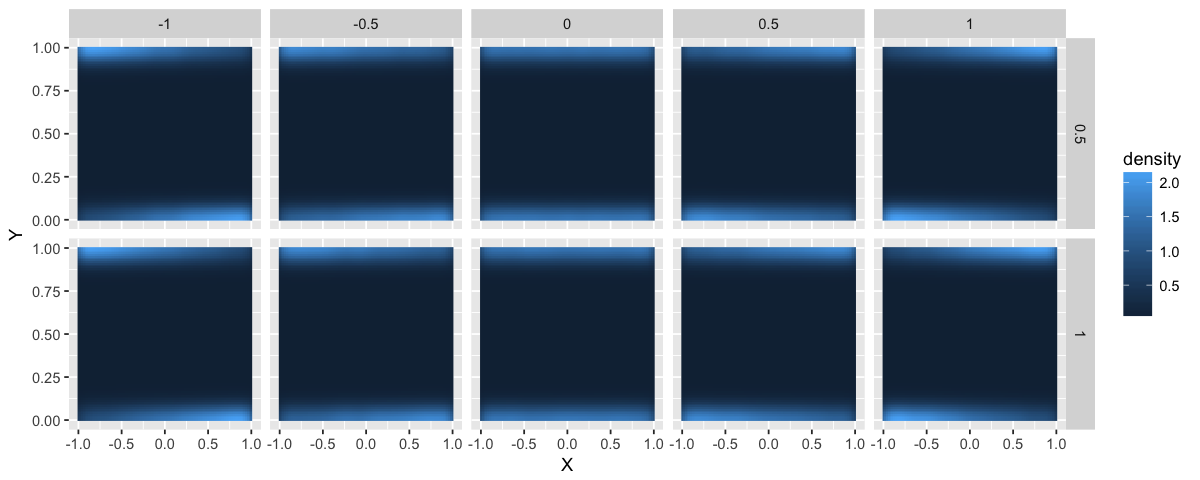

In [115]:
plotsize(10,4)
plot

In [90]:
ggsave("densities.pdf", plot=plot, device="pdf", width=10, height=5)